In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-08-15 11:14:26.433715: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-15 11:14:26.472252: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-15 11:14:27.009847: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/RJ_Reconstrucao_Sciaenidae_2024_08_06.xlsx')

df_Pescada_art_e_art_ind = pd.DataFrame(df[['Ano','Pescada_art','Pescada_ind','Pescada_art_ind']])

#Juntando valores de art e ind em art_ind(quando os 2 estão presentes) 
for i in range(len(df_Pescada_art_e_art_ind['Ano'])):
  if pd.isnull(df_Pescada_art_e_art_ind.iloc[i,3])==True and pd.isnull(df_Pescada_art_e_art_ind.iloc[i,2])==False and pd.isnull(df_Pescada_art_e_art_ind.iloc[i,1])==False:
    df_Pescada_art_e_art_ind.iloc[i,3] = df_Pescada_art_e_art_ind.iloc[i,2] + df_Pescada_art_e_art_ind.iloc[i,1] 

dados = df_Pescada_art_e_art_ind[['Ano','Pescada_art','Pescada_art_ind']].dropna().reset_index(drop=True)


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1962,1963,1964,1966,1967,1968,1969,1970,1971,1972,1973,1975,1976,1977])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Pescada_art'] = dados.loc[i,'Pescada_art'] / dados.loc[i,'Pescada_art_ind']



prop = dados['Prop_Pescada_art'].values
dados.head()

,Ano,Pescada_art,Pescada_art_ind,Prop_Pescada_art
0,1978,95.0,96.0,0.989583
1,1979,10555.0,10810.0,0.976411
2,1980,71.0,81.0,0.876543
3,1981,114.0,172.0,0.662791
4,1982,155.0,172.0,0.901163


In [8]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std

In [24]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=250, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/Desagregações Pescada_art/pesos prop Pescada_art.weights.h5', overwrite=True)

Epoch 1/250


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9771
Epoch 2/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9622 
Epoch 3/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8958 
Epoch 4/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8635 
Epoch 5/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8282 
Epoch 6/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8179 
Epoch 7/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8049 
Epoch 8/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7642 
Epoch 9/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7568 
Epoch 10/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7358 
Epoch 11/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7081 
Epoch 12/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6539 
Epoch 13/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6187 
Epoch 14/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5863 
Epoch 15/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5652 
Epoch 16/250
2/2 ━━━━━━━━━━━━━━━

In [5]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/Desagregações Pescada_art/pesos prop Pescada_art.weights.h5')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Previsões dos dados ausentes: [[0.9593476 ]
 [0.94883156]
 [0.9382722 ]
 [0.91715384]
 [0.9065975 ]
 [0.89604104]
 [0.88538283]
 [0.8747174 ]
 [0.864058  ]
 [0.85336757]
 [0.84267706]
 [0.8210468 ]
 [0.81018436]
 [0.7992816 ]]


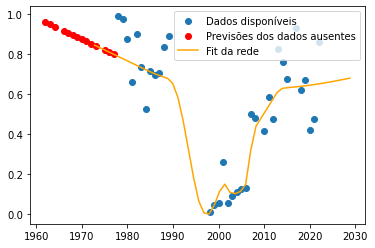

In [25]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>=1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

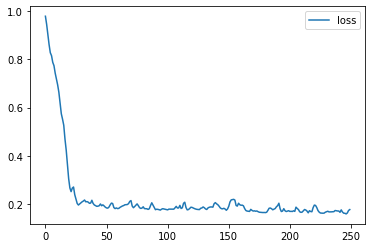

In [26]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [27]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1



df_preenchido = df[['Ano','Pescada_art']]
for i in range(len(prev_continua)):
    if i+1950 in anos_para_prever:
      df_preenchido.loc[i,'Pescada_art']=df.loc[i,'Pescada_art_ind']*prev_continua[i]


with pd.option_context('display.max_rows', None,):
    print(df_preenchido)


#Planilha com os dados preenchidos
df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/Desagregações Pescada_art/Previsão Pescada_art_1962-1977.xlsx')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
     Ano   Pescada_art
0   1950           NaN
1   1951           NaN
2   1952           NaN
3   1953           NaN
4   1954           NaN
5   1955           NaN
6   1956           NaN
7   1957           NaN
8   1958           NaN
9   1959           NaN
10  1960           NaN
11  1961           NaN
12  1962   1685.573730
13  1963   1958.388306
14  1964   2591.507812
15  1965           NaN
16  1966    686.031067
17  1967   1589.265381
18  1968   3625.382080
19  1969   2177.156494
20  1970   1780.049927
21  1971   2111.757812
22  1972   1443.044556
23  1973  21342.482422
24  1974           NaN
25  1975   7519.146973
26  1976   9912.605469
27  1977   4058.751953
28  1978     95.000000
29  1979  10555.000000
30  1980     71.000000
31  1981    114.000000
32  1982    155.000000
33  1983    188.000000
34  1984    133.000000
35  1985    158.000000
36  1986    148.000000
37  1987    175.000000
38  1988    186.000000
39  1989    242.000000
40  1990           

In [29]:
#Planilha com as previsões para Pescada_ind  (diferença entre art_ind e art)

Pescada_ind_preenchido = df[['Ano','Pescada_ind']]
for i in range(len(df_preenchido['Ano'])):
    if i+1950 in anos_para_prever:
        Pescada_ind_preenchido.loc[i,'Pescada_ind'] = df.loc[i,'Pescada_art_ind'] - df_preenchido.loc[i,'Pescada_art']

with pd.option_context('display.max_rows', None,):        
   print(Pescada_ind_preenchido)

Pescada_ind_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/Desagragações Pescada_ind/Previsão Pescada_ind_1962-1977.xlsx')

     Ano  Pescada_ind
0   1950          NaN
1   1951          NaN
2   1952          NaN
3   1953          NaN
4   1954          NaN
5   1955          NaN
6   1956          NaN
7   1957          NaN
8   1958          NaN
9   1959          NaN
10  1960          NaN
11  1961          NaN
12  1962    71.426270
13  1963   105.611694
14  1964   170.492188
15  1965          NaN
16  1966    61.968933
17  1967   163.734619
18  1968   420.617920
19  1969   281.843506
20  1970   254.950073
21  1971   332.242188
22  1972   247.955444
23  1973  3984.517578
24  1974          NaN
25  1975  1638.853027
26  1976  2322.394531
27  1977  1019.248047
28  1978     1.000000
29  1979   255.000000
30  1980    10.000000
31  1981    58.000000
32  1982    17.000000
33  1983    67.000000
34  1984   119.000000
35  1985    63.000000
36  1986    64.000000
37  1987    72.000000
38  1988    37.000000
39  1989    30.000000
40  1990          NaN
41  1991          NaN
42  1992          NaN
43  1993          NaN
44  1994  